In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import tensorflow as tf

import os
from skimage.io import imread
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from PIL import Image 
import numpy as np
from numpy import asarray


2024-02-28 13:20:56.619479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
path="/users/2024/ds2/119008303/Documents/ProjetDeepG/food-101/images"
types=os.listdir(path)
types

['beignets',
 'prime_rib',
 'ramen',
 'hamburger',
 'bruschetta',
 'chicken_wings',
 'pork_chop',
 'greek_salad',
 'sashimi',
 'risotto',
 'pizza',
 'eggs_benedict',
 'guacamole',
 'chocolate_cake',
 'miso_soup',
 'apple_pie',
 'fried_calamari',
 'fried_rice',
 'panna_cotta',
 'hummus',
 'carrot_cake',
 'beet_salad',
 'garlic_bread',
 'hot_dog',
 'steak',
 'tiramisu',
 'fish_and_chips',
 'caesar_salad',
 'tuna_tartare',
 'pancakes',
 'chocolate_mousse',
 'lasagna',
 'pad_thai',
 'cheesecake',
 'baklava',
 'ice_cream',
 'red_velvet_cake',
 'tacos',
 'foie_gras',
 'grilled_cheese_sandwich',
 'frozen_yogurt',
 'seaweed_salad',
 'breakfast_burrito',
 'crab_cakes',
 'strawberry_shortcake',
 'beef_tartare',
 'mussels',
 'dumplings',
 'creme_brulee',
 'falafel',
 'scallops',
 'oysters',
 'samosa',
 'club_sandwich',
 'french_fries',
 'chicken_quesadilla',
 'escargots',
 'huevos_rancheros',
 'french_toast',
 'lobster_bisque',
 'onion_rings',
 'waffles',
 'french_onion_soup',
 'spring_rolls',
 '

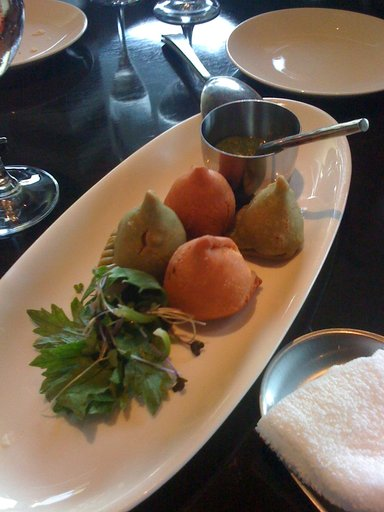

In [3]:
# open method used to open different extension image file 
im = Image.open('/users/2024/ds2/119008303/Documents/ProjetDeepG/food-101/images/samosa/71081.jpg')  
im

In [4]:
# load the image and convert into
# numpy array
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(im)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(512, 384, 3)


In [5]:
numpydata

array([[[133, 122, 118],
        [151, 147, 138],
        [141, 144, 133],
        ...,
        [ 20,  21,  25],
        [ 20,  21,  23],
        [ 16,  17,  19]],

       [[134, 123, 119],
        [150, 146, 137],
        [144, 147, 136],
        ...,
        [ 20,  21,  25],
        [ 19,  20,  22],
        [ 18,  19,  21]],

       [[130, 119, 115],
        [145, 141, 132],
        [146, 149, 138],
        ...,
        [ 17,  18,  22],
        [ 17,  18,  20],
        [ 19,  20,  22]],

       ...,

       [[237, 241, 240],
        [237, 241, 240],
        [237, 241, 240],
        ...,
        [140, 110, 102],
        [143, 110, 103],
        [142, 109, 102]],

       [[227, 233, 231],
        [226, 232, 230],
        [225, 231, 229],
        ...,
        [134, 104,  96],
        [136, 106,  98],
        [138, 108, 100]],

       [[227, 233, 231],
        [226, 232, 230],
        [224, 230, 228],
        ...,
        [129,  99,  91],
        [132, 102,  94],
        [135, 105,  97]]

In [6]:
#Fonction permettant d'ouvrir un jpeg et de le convertir en numpy array 
def convjpg(path):
    im= Image.open(path) 
    num= asarray(im)
    return num
#Convertit un doss de jpg en liste de numpy array
def convdos(path):
    elem=os.listdir(path)
    rendu=[convjpg(path+'/'+elem[0])]
    for i in elem[1:]:
        newpath=path+'/'+i
        rendu.append(convjpg(newpath))
    return rendu

In [7]:
A=convdos('/users/2024/ds2/119008303/Documents/ProjetDeepG/food-101/images/samosa')

In [8]:
len(A)

1000

In [13]:
#Voyons s'il y a une taille prédominante dans les photos
listeglobale=[]
for i in types[:10]:
    path2=path+'/'+i
    plus=convdos(path2)
    for j in plus:
        listeglobale.append(j)

In [15]:
#Nombre d'images traitées:
len(listeglobale)

10000

In [20]:
shapes=[listeglobale[i].shape for i in range(len(listeglobale))]
shapes[:20]

[(512, 384, 3),
 (512, 512, 3),
 (383, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (348, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (306, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 382, 3),
 (512, 512, 3),
 (384, 512, 3),
 (512, 512, 3),
 (471, 512, 3)]

In [23]:
"Taille prédominante semble être (512,512,3)"
print(shapes.count((512, 512, 3)), len(shapes))
"Cette taille est la majorité des 10000 images, on va récupérer 20000 images et filtrer par cette taille"

6008 10000


In [13]:
#Taille majoritaire:
taille=(512, 512, 3)

In [9]:
#Création de la liste d'images à traiter:
listim=[]
labels=[]
for i in types[:20]:
    path2=path+'/'+i
    plus=convdos(path2)
    for j in plus:
        labels.append(i)
        listim.append(j)

In [11]:
[ (i,labels.count(i)) for i in set(labels) ]

[('risotto', 1000),
 ('beignets', 1000),
 ('bruschetta', 1000),
 ('eggs_benedict', 1000),
 ('guacamole', 1000),
 ('fried_calamari', 1000),
 ('hummus', 1000),
 ('greek_salad', 1000),
 ('chocolate_cake', 1000),
 ('pizza', 1000),
 ('prime_rib', 1000),
 ('chicken_wings', 1000),
 ('ramen', 1000),
 ('miso_soup', 1000),
 ('hamburger', 1000),
 ('sashimi', 1000),
 ('panna_cotta', 1000),
 ('fried_rice', 1000),
 ('apple_pie', 1000),
 ('pork_chop', 1000)]

In [25]:
shapesim=[listim[i].shape for i in range(len(listim))]
shapesim[:20]

[(512, 384, 3),
 (512, 512, 3),
 (383, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (348, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (306, 512, 3),
 (512, 512, 3),
 (512, 512, 3),
 (512, 382, 3),
 (512, 512, 3),
 (384, 512, 3),
 (512, 512, 3),
 (471, 512, 3)]

In [26]:
print(shapesim.count(taille), len(shapesim))

12159 20000


In [16]:
samesize=[]
samelabels=[]
for i in range(len(listim)):
    if listim[i].shape==taille:
        samesize.append(listim[i])
        samelabels.append(labels[i])

#samesize=[listim[i] for i in range(len(listim)) if listim[i].shape==taille] si pas besoin des labels
print(len(samesize),len(samelabels))

12159 12159


In [18]:
#Création des échantillons d'entraînement et de test:
seed=20
X_train,X_test=train_test_split(samesize,random_state=seed)
Y_train,Y_test=train_test_split(samelabels,random_state=seed)

In [19]:
print(len(X_train),len(X_test))

9119 3040


In [17]:
#Consstruction de l'autoencodeur:

latent_dim = 64 
height=512  #=width
width=512
channels=3

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(262144, activation='sigmoid'),
      layers.Reshape((height, width))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)


In [20]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [21]:
autoencoder.fit(X_train, X_train,
                epochs=10,
                shuffle=True,
                validation_data=(X_test, X_test))



KeyboardInterrupt

